<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# Data Camp RAMP Challenge on the avalanche risk prediction

<i> Florent Blanc, Bryan Chen, Sibylle Degos, Alice Devilder, Rémy Grabet, Théo Paquier </i>

## Introduction

Describe the challenge, in particular:

- Where the data comes from?
- What is the task this challenge aims to solve?
- Why does it matter?

### Avalanche risk

Avalanches pose a significant threat to outdoor enthusiasts, ski patrol teams, and mountain communities. Predicting avalanche risk accurately is crucial for ensuring safety in mountainous regions. This challenge aims to leverage data science to analyze and forecast avalanche risk based on historical reports from Météo-France. By processing and interpreting structured data extracted from avalanche risk bulletins, we can improve preparedness and decision-making in avalanche-prone areas.  

### The BERA database, a catalog of avalanche risk bulletins

The data for this challenge comes from **Météo-France** through the **Bulletins d'Estimation du Risque d'Avalanche (BERA)**, which provide official assessments of avalanche hazards. Originally, these reports were only available in PDF format, making them difficult to analyze systematically. However, [multi-coop](https://gitlab.com/multi-coop/meteofrance_bra_hist) has extracted and structured this data into CSV files, categorized by mountain region (massif) and publication date.

The dataset consists of **34,286 records**, each representing a daily avalanche risk bulletin for a specific massif. It includes **47 features**, covering information on:
- **Avalanche risk levels (`risque1`, `risque2`, `risque_maxi`)** at different altitudes.
- **Geographic and temporal data (`massif`, `altitude`, `date`)**.
- **Weather conditions (`isotherme_0`, `precipitation_neige_veille_epaisseur`, `vent_altitude_*`)**.
- **Risk evolution trends (`evolurisque1`, `evolurisque2`)**.

This dataset provides a historical record of avalanche risk conditions, making it a valuable resource for predictive modeling.

### What is the task this challenge aims to solve?  
The main objective of this challenge is to **predict avalanche risk** based on the structured BERA data. By analyzing historical risk reports and meteorological conditions, we can develop models that estimate avalanche hazards more effectively.  

This task has multiple applications. First, it can help outdoor enthusiasts, ski patrols, and mountain rescue teams plan safer routes and make informed decisions before heading into avalanche-prone terrain. Additionally, the challenge aims to serve as an educational tool for analyzing past avalanche incidents, helping researchers and safety experts understand risk factors. Finally, by improving real-time risk estimation models, the challenge contributes to broader efforts in avalanche forecasting and disaster prevention.  

### Why does it matter?  
Avalanches are a deadly natural hazard, posing risks to skiers, snowboarders, mountaineers, and local communities. Developing accurate avalanche prediction models can save lives by providing crucial insights into when and where avalanches are most likely to occur.  

Improved avalanche forecasting enhances safety measures for ski resorts, backcountry travelers, and rescue operations. It also contributes to environmental and climate research, as avalanche behavior is influenced by broader weather patterns and climate change. By transforming unstructured reports into actionable insights, this challenge harnesses the power of data science to improve preparedness and response in mountainous regions.  

# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it.
This is the first set in any data science project, and here, you should give a sense of the data the participants will be working with.

You can first load and describe the data, and then show some interesting properties of it.

In [128]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns

### Get access to the training data

In [129]:
import problem
X_df, y = problem.get_train_data()

In [130]:
data = pd.concat([X_df,y],axis=1)

## The static features

**TODO** <span style="color:red">Red variables</span> are ids, labels, or other human-annotated features, so they should not be used as input in the classification. <span style="color:lightblue">Light blue variables</span> are legal but not likely to contribute information to the classification. Black variables are definitely discriminative.

- **Avalanche Risk Levels**: 
  - `risque1`: Estimated risk level for all altitudes or the lowest ones.
  - `risque2`: Estimated risk level for the highest altitudes.
  - `risque_maxi`: The highest risk level reported for a given massif.
- **Geographic and Temporal Information**:
  - `date`: The publication date of the bulletin.
  - `massif`: The mountain region for which the risk is assessed.
  - `altitude`: Altitude information, if available.
- **Meteorological Conditions**:
  - `isotherme_0`: Altitude of the 0°C isotherm.
  - `isotherme_moins_10`: Altitude of the -10°C isotherm.
  - `precipitation_neige_veille_epaisseur`: Snowfall height measured the day before.
  - `vitesse_vent_altitude_1`: Wind speed at a lower altitude.
  - `vitesse_vent_altitude_2`: Wind speed at a higher altitude.
  - `direction_vent_altitude_1`: Wind direction at a lower altitude.
  - `direction_vent_altitude_2`: Wind direction at a higher altitude.
  - `limite_pluie_neige`: Rain-snow limit altitude.
- **Risk Evolution and Additional Context**:
  - `evolurisque1`, `evolurisque2`: Evolution of risk levels over time.
  - `commentaire`: Additional commentary on risk conditions.
  - `url_telechargement`: Link to the original BERA report in PDF format. 

In [131]:
X_df.head()

,date,massif,evolurisque1,altitude,risque2,risque_maxi,00_temps,00_mer_de_nuages,00_limite_pluie_neige,00_isotherme_0,00_isotherme_moins_10,00_altitude_vent_1,00_altitude_vent_2,00_direction_vent_altitude_1,00_vitesse_vent_altitude_1,00_direction_vent_altitude_2,00_vitesse_vent_altitude_2,06_temps,06_mer_de_nuages,06_limite_pluie_neige,06_isotherme_0,06_isotherme_moins_10,06_altitude_vent_1,06_altitude_vent_2,06_direction_vent_altitude_1,06_vitesse_vent_altitude_1,06_direction_vent_altitude_2,06_vitesse_vent_altitude_2,12_temps,12_mer_de_nuages,12_limite_pluie_neige,12_isotherme_0,12_isotherme_moins_10,12_altitude_vent_1,12_altitude_vent_2,12_direction_vent_altitude_1,12_vitesse_vent_altitude_1,12_direction_vent_altitude_2,12_vitesse_vent_altitude_2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur
0,2020-01-21,HAUT-VAR_HAUT-VERDON,NaN,NaN,2.0,2,Très nuageux,Non,Sans objet,1200,3600,3000,Sans objet,SE,60,Sans objet,Sans objet,Eclaircies,Non,Sans objet,1400,3800,3000,Sans objet,E,60,Sans objet,Sans objet,Variable,Non,Sans objet,1900,3900,3000,Sans objet,E,50,Sans objet,Sans objet,1800,0
1,2019-02-11,CINTO-ROTONDO,NaN,1800.0,2.0,2,Peu nuageux,Non,Sans objet,1600,4300,1500,3000,W,40,W,100,Averses de neige,Non,700,1000,2600,1500,3000,W,40,W,110,Averses de neige,Non,900,1200,2400,1500,3000,NW,50,NW,60,1800,0
2,2021-11-19,HAUTE-MAURIENNE,NaN,3000.0,3.0,3,Beau temps,Non,Sans objet,3200,4900,3000,4000,_,0,E,30,Beau temps,Non,Sans objet,3400,4900,3000,4000,NE,10,E,20,Beau temps,Non,Sans objet,3500,5000,3000,4000,_,0,_,0,1800,0
3,2020-01-26,OISANS,NaN,2200.0,2.0,3,Variable,Non,Sans objet,1900,3300,2500,3500,SE,10,SW,20,Neige faible,Non,1200,1600,3300,2500,3500,_,0,SW,20,Neige faible,Non,1300,1600,3300,2500,3500,_,0,W,30,1800,5
4,2021-12-08,VANOISE,NaN,NaN,4.0,4,Neige faible,Non,1200,2200,3700,3000,4000,SW,20,W,40,Neige modérée,Non,800,1000,3500,3000,4000,_,0,SW,40,Neige modérée,Non,400,700,2800,3000,4000,N,20,NW,20,1800,35


In [132]:
# Summary statistics
data.describe()

,evolurisque1,altitude,risque2,risque_maxi,risque1
count,2913.000000,9046.000000,21862.000000,21862.000000,21862.000000
mean,2.348438,2248.960867,2.040847,2.165859,1.641753
std,0.603144,283.113315,0.823429,0.807217,0.761482
min,1.000000,1300.000000,1.000000,1.000000,1.000000
25%,2.000000,2000.000000,1.000000,2.000000,1.000000
50%,2.000000,2200.000000,2.000000,2.000000,1.000000
75%,3.000000,2400.000000,3.000000,3.000000,2.000000
max,5.000000,3600.000000,5.000000,5.000000,5.000000


## The risk levels

The avalanche risk levels are classified into five categories, ranging from low to extreme risk. These levels are defined as follows:

- **Level 1 (Low)**: Low risk of avalanches, natural triggers are unlikely.

- **Level 2 (Moderate)**: Moderate risk of avalanches, natural triggers are possible.

- **Level 3 (Considerable)**: Considerable risk of avalanches, natural triggers are likely.

- **Level 4 (High)**: High risk of avalanches, natural triggers are very likely.

- **Level 5 (Very High)**: Very high risk of avalanches, natural triggers are certain.

The risk levels are reported for different altitudes, with `risque1` and `risque2` representing the risk levels at lower and higher altitudes, respectively. The `risque_maxi` variable indicates the highest risk level reported for a given massif.

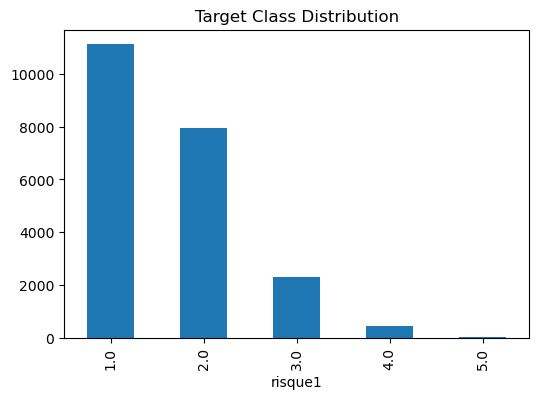

In [133]:
# Class distribution
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.title("Target Class Distribution")
plt.show()

Check the number of Nan per column

In [134]:
data.columns

Index(['date', 'massif', 'evolurisque1', 'altitude', 'risque2', 'risque_maxi',
       '00_temps', '00_mer_de_nuages', '00_limite_pluie_neige',
       '00_isotherme_0', '00_isotherme_moins_10', '00_altitude_vent_1',
       '00_altitude_vent_2', '00_direction_vent_altitude_1',
       '00_vitesse_vent_altitude_1', '00_direction_vent_altitude_2',
       '00_vitesse_vent_altitude_2', '06_temps', '06_mer_de_nuages',
       '06_limite_pluie_neige', '06_isotherme_0', '06_isotherme_moins_10',
       '06_altitude_vent_1', '06_altitude_vent_2',
       '06_direction_vent_altitude_1', '06_vitesse_vent_altitude_1',
       '06_direction_vent_altitude_2', '06_vitesse_vent_altitude_2',
       '12_temps', '12_mer_de_nuages', '12_limite_pluie_neige',
       '12_isotherme_0', '12_isotherme_moins_10', '12_altitude_vent_1',
       '12_altitude_vent_2', '12_direction_vent_altitude_1',
       '12_vitesse_vent_altitude_1', '12_direction_vent_altitude_2',
       '12_vitesse_vent_altitude_2', 'precipitation_neig

In [135]:
print("Missing Values:\n", data.isna().sum())

Missing Values:
 date                                        0
massif                                      0
evolurisque1                            18949
altitude                                12816
risque2                                     0
risque_maxi                                 0
00_temps                                    0
00_mer_de_nuages                            0
00_limite_pluie_neige                       0
00_isotherme_0                              0
00_isotherme_moins_10                       0
00_altitude_vent_1                          0
00_altitude_vent_2                          0
00_direction_vent_altitude_1                0
00_vitesse_vent_altitude_1                  0
00_direction_vent_altitude_2                0
00_vitesse_vent_altitude_2                  0
06_temps                                    0
06_mer_de_nuages                            0
06_limite_pluie_neige                       0
06_isotherme_0                              0
06_isotherme_moin

In [136]:
data['evolurisque1'] = data['evolurisque1'].fillna(data['evolurisque1'].mean())
data['altitude'] = data['altitude'].fillna(data['altitude'].mean())

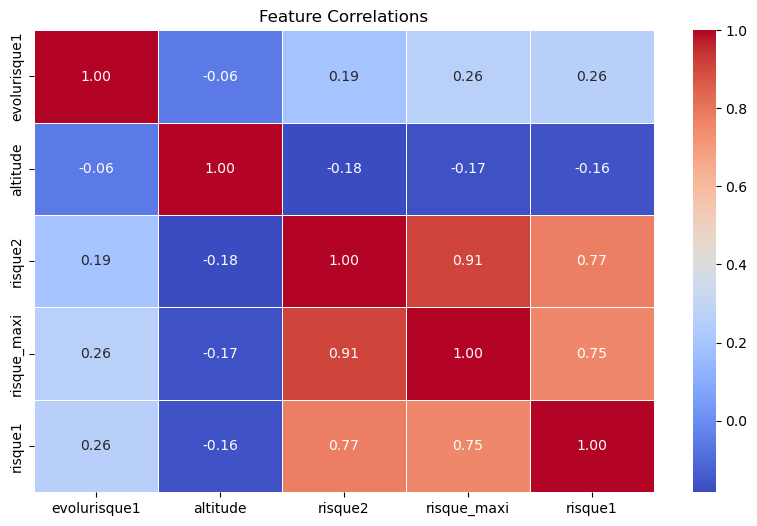

In [137]:
# Select only numerical columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()

Check the mean risk for each massif :

In [138]:
massifs = data['massif'].unique()

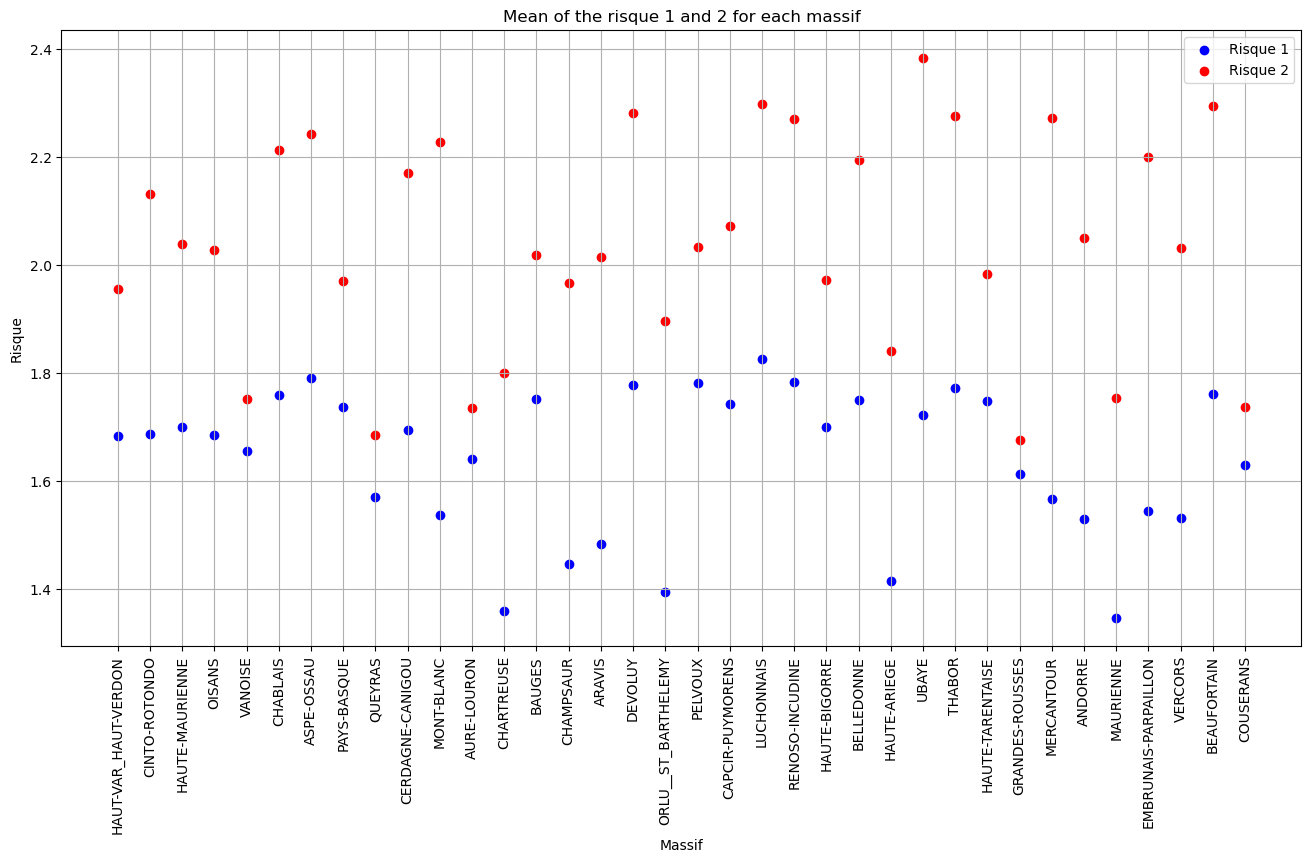

In [139]:
data_massif = data.groupby('massif')

# Plot the mean of the target variable for each massif and the risque 2 variable
plt.figure(figsize=(16,8))
plt.scatter(massifs, data_massif['risque1'].mean(), c='b')
plt.scatter(massifs, data_massif['risque2'].mean(), c='r')
plt.xticks(rotation=90)
plt.xlabel('Massif')
plt.ylabel('Risque')
plt.legend(['Risque 1', 'Risque 2'])
plt.title('Mean of the risque 1 and 2 for each massif')
plt.grid()
plt.show()

### Create a time series plot of the risk levels

In [140]:
# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

In [141]:
# Check if the date are unique to put them as index
data['date'].nunique() == data.shape[0]

False

The date is not unique so we will have to group by massif and then date to plot the risk levels over time.

In [142]:
df_massifs = {massif: data[data['massif'] == massif] for massif in massifs}

Check if there are duplicates in the data for the same massif and date.

In [143]:
for massif, df in df_massifs.items():
    unique_dates = df['date'].nunique()
    total_rows = df.shape[0]
    
    print(f"Massif: {massif}")
    print(f"Unique dates: {unique_dates}, Total rows: {total_rows}")
    print(f"Are all dates unique? {'Yes' if unique_dates == total_rows else 'No'}\n")


Massif: HAUT-VAR_HAUT-VERDON
Unique dates: 597, Total rows: 597
Are all dates unique? Yes

Massif: CINTO-ROTONDO
Unique dates: 611, Total rows: 611
Are all dates unique? Yes

Massif: HAUTE-MAURIENNE
Unique dates: 606, Total rows: 606
Are all dates unique? Yes

Massif: OISANS
Unique dates: 616, Total rows: 616
Are all dates unique? Yes

Massif: VANOISE
Unique dates: 611, Total rows: 611
Are all dates unique? Yes

Massif: CHABLAIS
Unique dates: 598, Total rows: 598
Are all dates unique? Yes

Massif: ASPE-OSSAU
Unique dates: 607, Total rows: 607
Are all dates unique? Yes

Massif: PAYS-BASQUE
Unique dates: 620, Total rows: 620
Are all dates unique? Yes

Massif: QUEYRAS
Unique dates: 618, Total rows: 618
Are all dates unique? Yes

Massif: CERDAGNE-CANIGOU
Unique dates: 619, Total rows: 619
Are all dates unique? Yes

Massif: MONT-BLANC
Unique dates: 613, Total rows: 613
Are all dates unique? Yes

Massif: AURE-LOURON
Unique dates: 595, Total rows: 595
Are all dates unique? Yes

Massif: CHARTR

In [144]:
def reshape_massif_data(df):
    """
    Reshapes the dataframe to keep all columns while ensuring 
    each day has 3 rows (one for 00:00, one for 06:00, and one for 12:00).
    """

    # Identify core variable names (without time prefixes)
    core_vars = [
        "temps", "mer_de_nuages", "limite_pluie_neige", "isotherme_0",
        "isotherme_moins_10", "altitude_vent_1", "altitude_vent_2",
        "direction_vent_altitude_1", "vitesse_vent_altitude_1",
        "direction_vent_altitude_2", "vitesse_vent_altitude_2"
    ]

    # Keep non-time-dependent columns
    other_columns = [
        "date", "massif", "evolurisque1", "altitude", "risque1", "risque2", "risque_maxi",
        "precipitation_neige_veille_altitude", "precipitation_neige_veille_epaisseur"
    ]

    reshaped_data = []

    # Process each time 
    for time in ["00", "06", "12"]:
        # Select the time-specific columns
        selected_cols = [f"{time}_{var}" for var in core_vars]

        # Extract the relevant columns
        df_subset = df[other_columns + selected_cols].copy()

        # Rename time-prefixed columns to remove the time prefix
        df_subset.columns = other_columns + core_vars

        # Set the correct time for each row
        df_subset["date"] = df_subset["date"].dt.normalize() + pd.to_timedelta(f"{time}:00:00")

        # Append transformed dataframe
        reshaped_data.append(df_subset)

    # Concatenate the three time-based DataFrames
    return pd.concat(reshaped_data).sort_values(by=["massif", "date"]).reset_index(drop=True)

# Apply transformation for all massifs
df_transformed_massifs = {massif: reshape_massif_data(df) for massif, df in df_massifs.items()}

# # Merge all massifs into a single DataFrame
# df_final = pd.concat(df_transformed_massifs.values()).reset_index(drop=True)

# # Check the result
# print(df_final.head())


In [145]:
df_transformed_massifs['VANOISE'].head()

,date,massif,evolurisque1,altitude,risque1,risque2,risque_maxi,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur,temps,mer_de_nuages,limite_pluie_neige,isotherme_0,isotherme_moins_10,altitude_vent_1,altitude_vent_2,direction_vent_altitude_1,vitesse_vent_altitude_1,direction_vent_altitude_2,vitesse_vent_altitude_2
0,2018-12-17 00:00:00,VANOISE,2.348438,2400.0,2.0,3.0,3,1800,10,Neige modérée,Non,1200,1500,3000,3000,4000,NW,20,NW,30
1,2018-12-17 06:00:00,VANOISE,2.348438,2400.0,2.0,3.0,3,1800,10,Neige faible,Non,1000,1100,2700,3000,4000,NW,30,NW,60
2,2018-12-17 12:00:00,VANOISE,2.348438,2400.0,2.0,3.0,3,1800,10,Variable,Non,Sans objet,1100,2600,3000,4000,NW,30,NW,50
3,2018-12-18 00:00:00,VANOISE,2.348438,2400.0,2.0,3.0,3,1800,3,Beau temps,Non,Sans objet,1900,3900,3000,4000,NW,10,NW,50
4,2018-12-18 06:00:00,VANOISE,2.348438,2400.0,2.0,3.0,3,1800,3,Beau temps,Non,Sans objet,2200,4000,3000,4000,W,10,NW,30


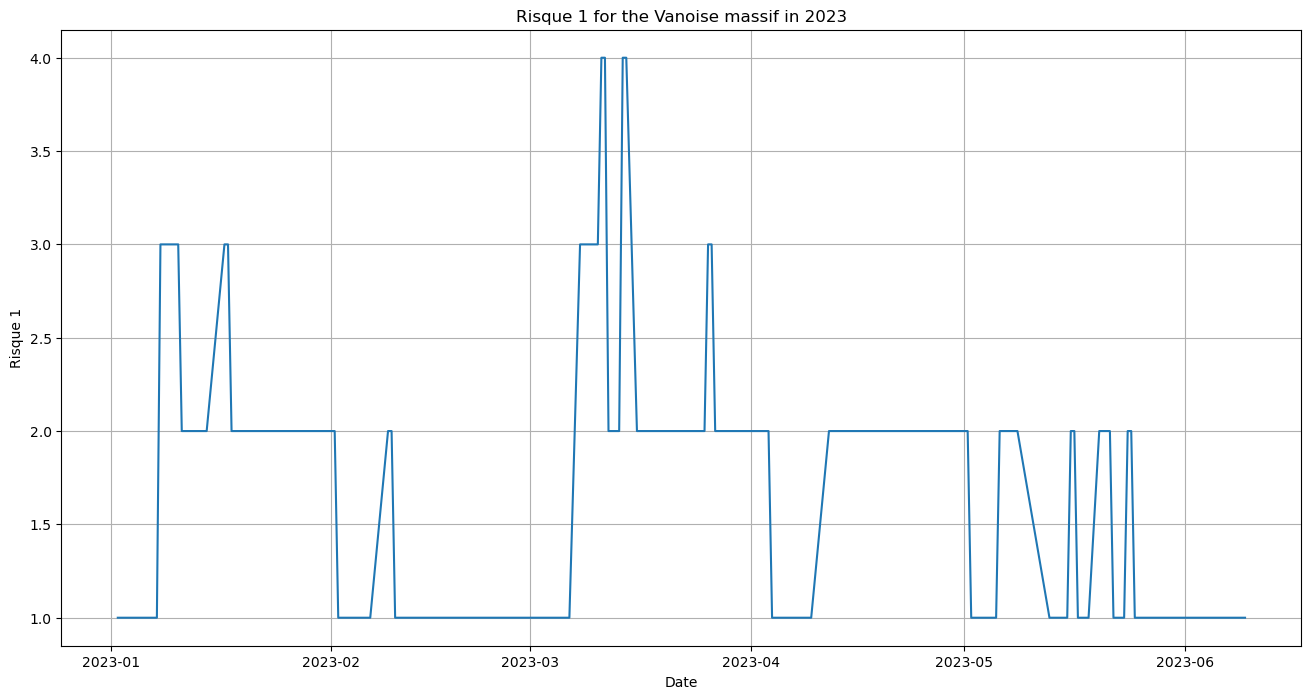

In [146]:
# Plot the risque 1 for the Vanoise massif in 2023
vanoise_2023 = df_transformed_massifs['VANOISE'][df_transformed_massifs['VANOISE']['date'].dt.year == 2023]
plt.figure(figsize=(16,8))
plt.plot(vanoise_2023['date'], vanoise_2023['risque1'])
plt.xlabel('Date')
plt.ylabel('Risque 1')
plt.title('Risque 1 for the Vanoise massif in 2023')
plt.grid()
plt.show()

Convert object features to integers when possible

In [147]:
columns_to_convert = ['precipitation_neige_veille_altitude', 'precipitation_neige_veille_epaisseur', 'mer_de_nuages', 
                      'limite_pluie_neige', 'isotherme_0', 'isotherme_moins_10', 'altitude_vent_1', 'altitude_vent_2',
                      'vitesse_vent_altitude_1', 'vitesse_vent_altitude_2']

for massif, df in df_transformed_massifs.items():
    # set date as index
    df.set_index('date', inplace=True)

    

    # convert columns to numeric
    for col in columns_to_convert:
        column_data = df[col]
        column_data_numeric = pd.to_numeric(column_data, errors='coerce')
        if col == 'precipitation_neige_veille_epaisseur':
            df['is_pluie'] = (column_data == "Pluie").astype(int)
            column_data_numeric = np.nan_to_num(column_data_numeric, nan=-1).astype(int)
        if col == 'mer_de_nuages':
            column_data_numeric = column_data_numeric.fillna(column_data.replace({
                "Non": 0,  # Assign 0 for "Non"
                "Absence de données": -1  # Assign -1 for missing data
            }))
        else:
            column_data_numeric = np.nan_to_num(column_data_numeric, nan=-1).astype(int)
        df[col] = column_data_numeric


C:\Users\alice\AppData\Local\Temp\ipykernel_16436\1512012796.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = column_data_numeric.fillna(column_data.replace({
C:\Users\alice\AppData\Local\Temp\ipykernel_16436\1512012796.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_data_numeric = column_data_numeric.fillna(column_data.replace({
C:\Users\alice\AppData\Local\Temp\ipykernel_16436\1512012796.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future versio

## Correlation matrix across the massifs and the mean correlation

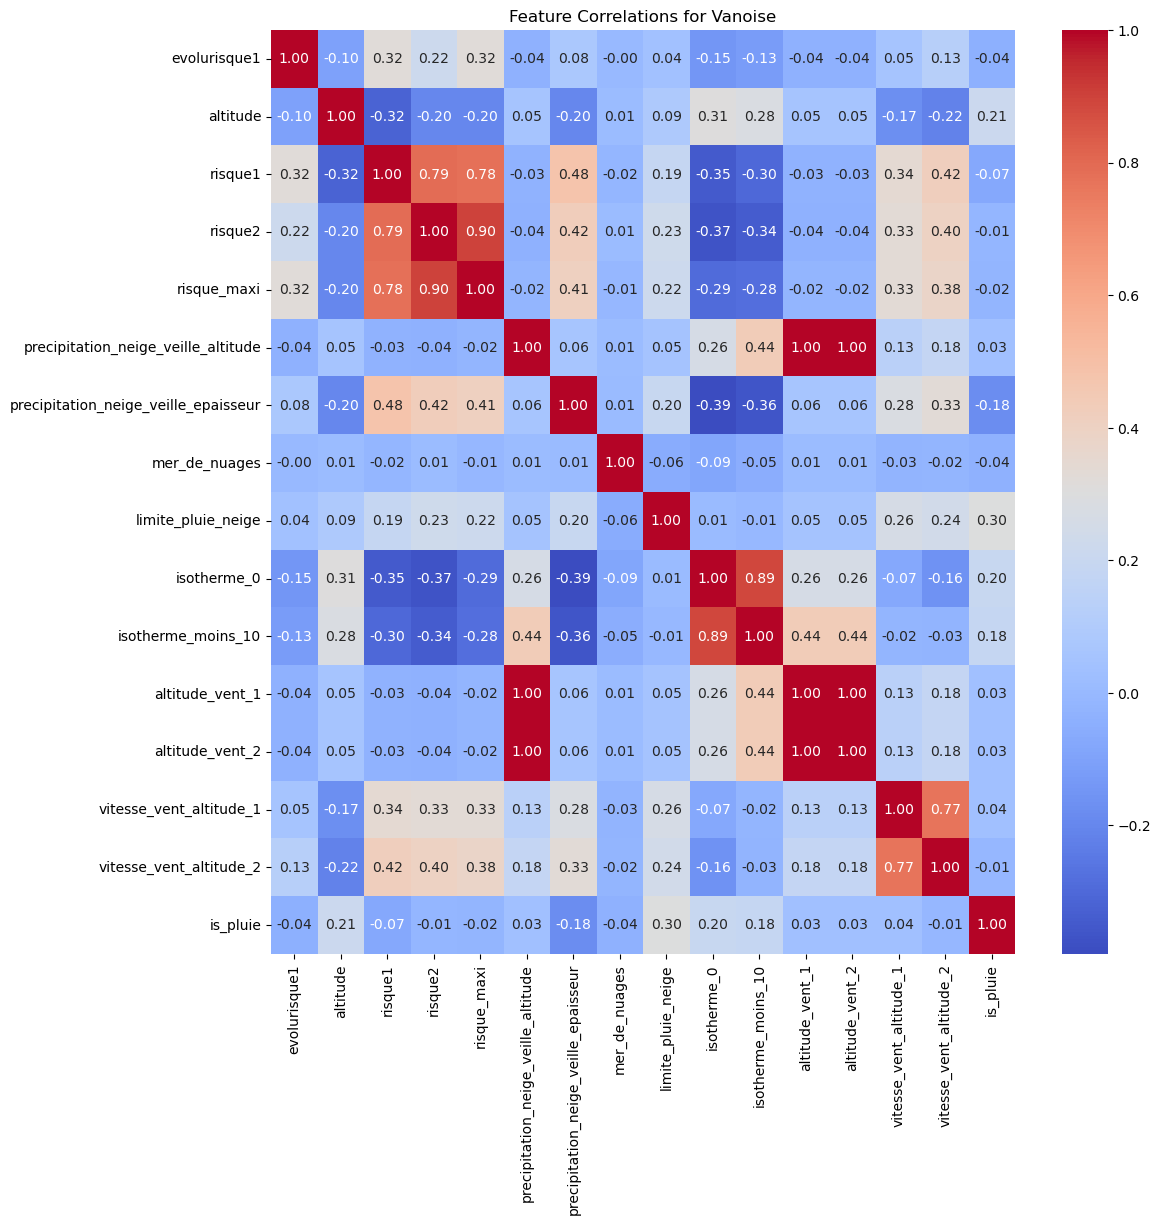

In [149]:
# Plot the correlation heatmap of the vanoise massif
numeric_data_vanoise = df_transformed_massifs['VANOISE'].select_dtypes(include=['number'])
corr_matrix = numeric_data_vanoise.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations for Vanoise")
plt.show()

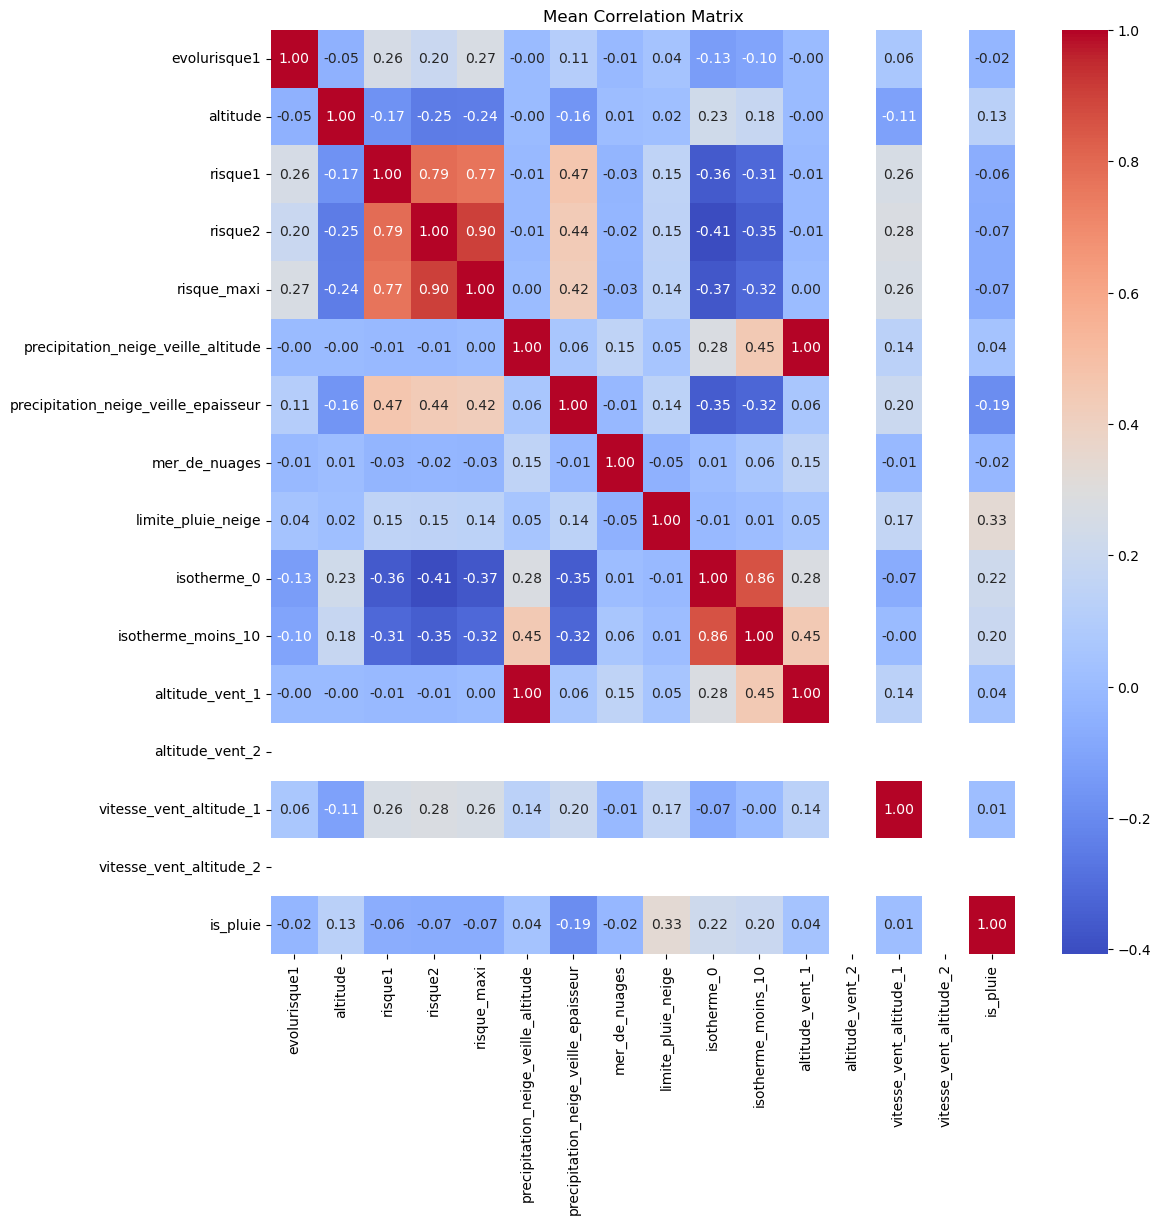

In [150]:
correlation_matrices = []

# Compute the correlation matrix for each region for hourly data
for _, df in df_transformed_massifs.items():
    if not df.empty:
        numeric_data = df.select_dtypes(include=['number'])
        corr_matrix = numeric_data.corr()
        correlation_matrices.append(corr_matrix)

# Compute the mean correlation matrix
if correlation_matrices:
    mean_correlation_matrix = sum(correlation_matrices) / len(correlation_matrices)

# Plot the mean correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Correlation Matrix')
plt.show()

In [151]:
# Correlation with the target variable
mean_correlation_matrix['risque1'].sort_values(ascending=False)


risque1                                 1.000000
risque2                                 0.787484
risque_maxi                             0.766843
precipitation_neige_veille_epaisseur    0.466321
vitesse_vent_altitude_1                 0.263306
evolurisque1                            0.257901
limite_pluie_neige                      0.150872
altitude_vent_1                        -0.010544
precipitation_neige_veille_altitude    -0.010544
mer_de_nuages                          -0.029456
is_pluie                               -0.063446
altitude                               -0.173300
isotherme_moins_10                     -0.314008
isotherme_0                            -0.357630
altitude_vent_2                              NaN
vitesse_vent_altitude_2                      NaN
Name: risque1, dtype: float64

The correlation analysis reveals that **`risque2` (0.79), `risque_maxi` (0.77), and `precipitation_neige_veille_epaisseur` (0.47)** have the strongest positive relationships with `risque1`, making them crucial for predicting avalanche risk. **`evolurisque1` (0.32) and `vitesse_vent_altitude_1` (0.26)** also show moderate correlations, suggesting they contribute meaningfully to risk estimation. Conversely, several features exhibit weak or negligible correlations, such as **`altitude_vent_1`, `precipitation_neige_veille_altitude`, `mer_de_nuages`, and `is_pluie`**, indicating they may not provide significant predictive power. Some features, including **`altitude` (-0.30), `isotherme_0` (-0.36), and `isotherme_moins_10` (-0.31)**, have moderate negative correlations, warranting further investigation before removal. Additionally, **`altitude_vent_2` and `vitesse_vent_altitude_2`** contain missing correlation values (NaN), suggesting they should be dropped due to potential data inconsistencies. Based on these insights, we recommend keeping highly correlated features while dropping those with very weak or missing correlations to improve model performance.


In [152]:
# Create a list containig the features that have a correlation with the target variable greater than 0.1
features = mean_correlation_matrix['risque1'][abs(mean_correlation_matrix['risque1']) > 0.1].index.tolist()

In [153]:
for massif, df in df_transformed_massifs.items():
    df_transformed_massifs[massif] = df[features]

In [154]:
# y_df = y.to_frame().reset_index(drop=True)
# y_expanded = pd.concat([y_df] * 3, ignore_index=True)
# y_expanded = y_expanded.squeeze()


### Split the data into training and testing sets

As we are dealing with time series data, we will split the dataset based on the publication date.For the training data, we will use bulletins published from 2018 to 2022, and for the testing data, we will use bulletins published in 2023.

In [155]:
X_train_dict = {}
y_train_dict = {}
X_test_dict = {}
y_test_dict = {}

for massif, df in df_transformed_massifs.items():
    if not df.empty:
        # X_train massif data before 2023
        X_train_dict[massif] = df[df.index.year < 2023]
        X_train_dict[massif].drop(columns=['risque1'], inplace=True)
        # y_train massif data before 2023
        y_train_dict[massif] = df[df.index.year < 2023]['risque1']
        # X_test massif data in 2023
        X_test_dict[massif] = df[df.index.year == 2023]
        X_test_dict[massif].drop(columns=['risque1'], inplace=True)
        # y_test massif data in 2023
        y_test_dict[massif] = df[df.index.year == 2023]['risque1']


C:\Users\alice\AppData\Local\Temp\ipykernel_16436\1283874332.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_dict[massif].drop(columns=['risque1'], inplace=True)
C:\Users\alice\AppData\Local\Temp\ipykernel_16436\1283874332.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_dict[massif].drop(columns=['risque1'], inplace=True)
C:\Users\alice\AppData\Local\Temp\ipykernel_16436\1283874332.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

# Challenge evaluation

A particularly important point in a challenge is to describe how it is evaluated. This is the section where you should describe the metric that will be used to evaluate the participants' submissions, as well as your evaluation strategy, in particular if there is some complexity in the way the data should be split to ensure valid results.

# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [156]:
# %load submissions/starting_kit/estimator.py

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


def get_estimator(df_final):
    # Identify numerical and categorical features
    num_features = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df_final.select_dtypes(include=['object', 'category']).columns.tolist()

    # Preprocessing Pipelines
    num_pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler()
    )

    cat_pipeline = make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore')
    )

    # Combine preprocessing steps
    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

    # Define Model Pipeline 
    model_pipeline = make_pipeline(
        preprocessor,
        LogisticRegression(max_iter=1000)
    )

    return model_pipeline


## Testing using a scikit-learn pipeline

In [157]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
df_final = df_transformed_massifs['VANOISE']
X = df_final.drop(columns=['risque1'])
y = df_final['risque1']
model = get_estimator(X)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy Scores for the Vanoise massif:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores for the Vanoise massif: [0.77656676 0.78474114 0.72752044 0.82786885 0.7704918 ]
Mean Accuracy: 0.7774377987224728
Standard Deviation: 0.032054262459866464


In [158]:
from sklearn.metrics import accuracy_score

# Train and Evaluate the Model for Each Massif
accuracy_results = {}

for massif in X_train_dict.keys():
    print(f"Training model for {massif}...")

    X_train = X_train_dict[massif]
    y_train = y_train_dict[massif]
    X_test = X_test_dict[massif]
    y_test = y_test_dict[massif]

    if X_train.empty or X_test.empty:
        print(f"Skipping {massif} due to lack of data.")
        continue

    model = get_estimator(X_train)  # Pass massif-specific dataset
    model.fit(X_train, y_train)  # Train model

    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy

    accuracy_results[massif] = accuracy
    print(f"Accuracy for {massif}: {accuracy:.4f}\n")

# Display overall results
print("\nOverall Accuracy Results:")
for massif, acc in accuracy_results.items():
    print(f"{massif}: {acc:.4f}")

# Compute Mean Accuracy Across Massifs
mean_accuracy = np.mean(list(accuracy_results.values()))
print(f"\nMean Accuracy Across Massifs: {mean_accuracy:.4f}")

Training model for HAUT-VAR_HAUT-VERDON...
Accuracy for HAUT-VAR_HAUT-VERDON: 0.9424

Training model for CINTO-ROTONDO...
Accuracy for CINTO-ROTONDO: 0.9463

Training model for HAUTE-MAURIENNE...
Accuracy for HAUTE-MAURIENNE: 0.7706

Training model for OISANS...
Accuracy for OISANS: 0.7018

Training model for VANOISE...
Accuracy for VANOISE: 0.7949

Training model for CHABLAIS...
Accuracy for CHABLAIS: 0.6699

Training model for ASPE-OSSAU...
Accuracy for ASPE-OSSAU: 0.7278

Training model for PAYS-BASQUE...
Accuracy for PAYS-BASQUE: 1.0000

Training model for QUEYRAS...
Accuracy for QUEYRAS: 0.8378

Training model for CERDAGNE-CANIGOU...
Accuracy for CERDAGNE-CANIGOU: 0.9044

Training model for MONT-BLANC...
Accuracy for MONT-BLANC: 0.7965

Training model for AURE-LOURON...
Accuracy for AURE-LOURON: 0.7847

Training model for CHARTREUSE...
Accuracy for CHARTREUSE: 1.0000

Training model for BAUGES...
Accuracy for BAUGES: 1.0000

Training model for CHAMPSAUR...
Accuracy for CHAMPSAUR: 

## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).